In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: f'{x:,.2f}')
sns.set_style('whitegrid')


In [135]:
def load_and_clean_data():
    file_path = input("Enter the path to your CSV file: ")
    
    try:
        data = pd.read_csv(file_path, encoding='latin1')
        print("Dataset loaded successfully!")
    except Exception as e:
        print("Error loading file. Attempting UTF-8 encoding...")
        try:
            data = pd.read_csv(file_path, encoding='utf-8')
            print("Dataset loaded successfully with UTF-8 encoding!")
        except Exception as e2:
            print(f"Error: {e2}")
            return None

    print(f"\nInitial Dataset Shape: {data.shape}\n")
    print(f"Columns in the Dataset: {list(data.columns)}\n")

    missing_values = data.isnull().sum().sum()
    data_cleaned = data.dropna()
    print(f"Missing Values Removed: {missing_values}")
    print(f"Shape After Cleaning: {data_cleaned.shape}\n")
    
    for col in ['Order Date', 'Ship Date']:
        if col in data_cleaned.columns:
            data_cleaned[col] = pd.to_datetime(data_cleaned[col], errors='coerce')
    
    print("Data cleaning completed successfully!\n")
    return data_cleaned
data_cleaned = load_and_clean_data()


Enter the path to your CSV file:  Sample - Superstore.csv


Dataset loaded successfully!

Initial Dataset Shape: (9994, 21)

Columns in the Dataset: ['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit']

Missing Values Removed: 0
Shape After Cleaning: (9994, 21)

Data cleaning completed successfully!



C:\Users\ahmed\AppData\Local\Temp\ipykernel_9224\2035037961.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=sales_rep_sales.head(20), x='Customer ID', y='Sales', palette='viridis')  # Displaying top 20


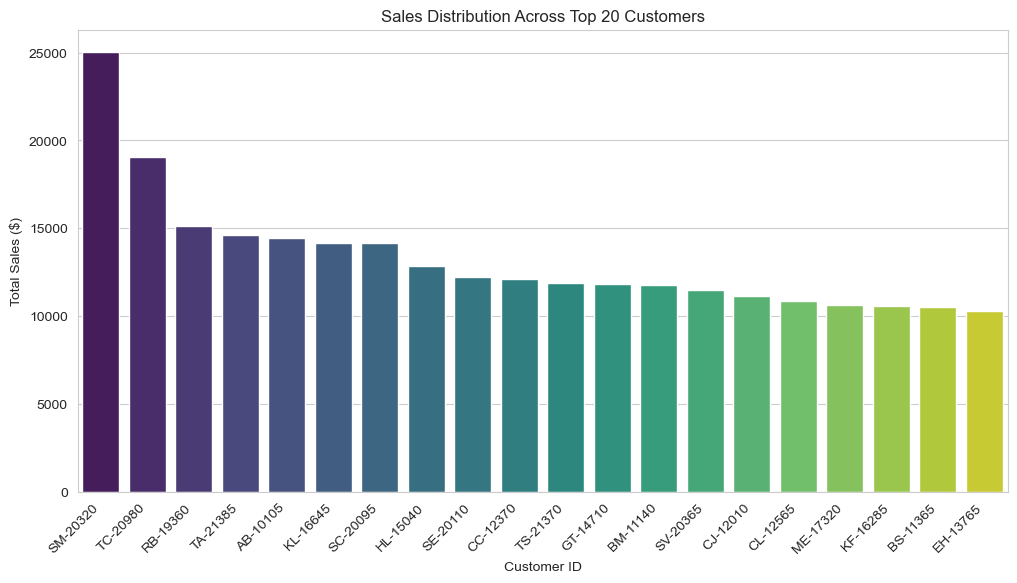


--- Symmetric Summary for Sales Distribution by Customer ---
count      793.00
mean     2,896.85
std      2,628.67
min          4.83
25%      1,146.05
50%      2,256.39
75%      3,785.28
max     25,043.05
Name: Sales, dtype: float64


In [189]:
def sales_by_sales_rep(data):
    if 'Customer ID' in data.columns: 
        sales_rep_sales = data.groupby('Customer ID')['Sales'].sum().reset_index()
        sales_rep_sales = sales_rep_sales.sort_values(by='Sales', ascending=False)
        plt.figure(figsize=(12, 6))
        sns.barplot(data=sales_rep_sales.head(20), x='Customer ID', y='Sales', palette='viridis')  # Displaying top 20
        plt.title("Sales Distribution Across Top 20 Customers")
        plt.xlabel("Customer ID")
        plt.ylabel("Total Sales ($)")
        plt.xticks(rotation=45, ha='right')
        plt.show()
        summary = sales_rep_sales['Sales'].describe()
        print("\n--- Symmetric Summary for Sales Distribution by Customer ---")
        print(summary)
        return sales_rep_sales, summary
    else:
        print("Column 'Customer ID' not found in the dataset.")
sales_data, summary = sales_by_sales_rep(data_cleaned)

<Figure size 1200x600 with 0 Axes>

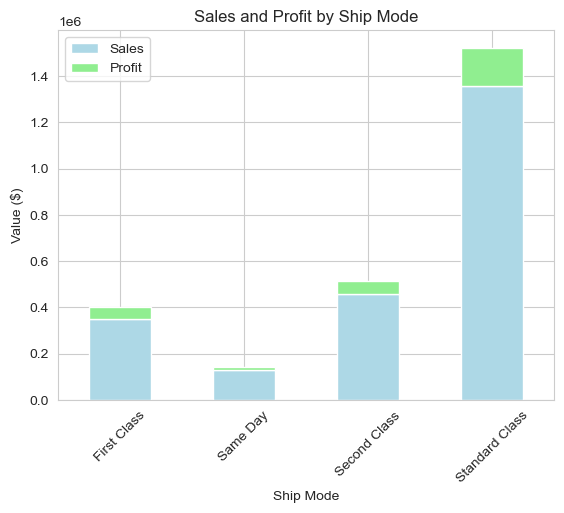

,Sales,Profit
Ship Mode,,
First Class,"351,428.42","48,969.84"
Same Day,"128,363.12","15,891.76"
Second Class,"459,193.57","57,446.64"
Standard Class,"1,358,215.74","164,088.79"


In [183]:
def analyze_ship_mode(data):
    if 'Ship Mode' in data.columns:
        ship_mode_analysis = data.groupby('Ship Mode')[['Sales', 'Profit']].sum()
        plt.figure(figsize=(12, 6))
        ship_mode_analysis[['Sales', 'Profit']].plot(kind='bar', stacked=True, color=['lightblue', 'lightgreen'])
        plt.title("Sales and Profit by Ship Mode")
        plt.xlabel("Ship Mode")
        plt.ylabel("Value ($)")
        plt.xticks(rotation=45)
        plt.show()
        return ship_mode_analysis
    else:
        print("'Ship Mode' column not found in the dataset.")
analyze_ship_mode(data_cleaned)

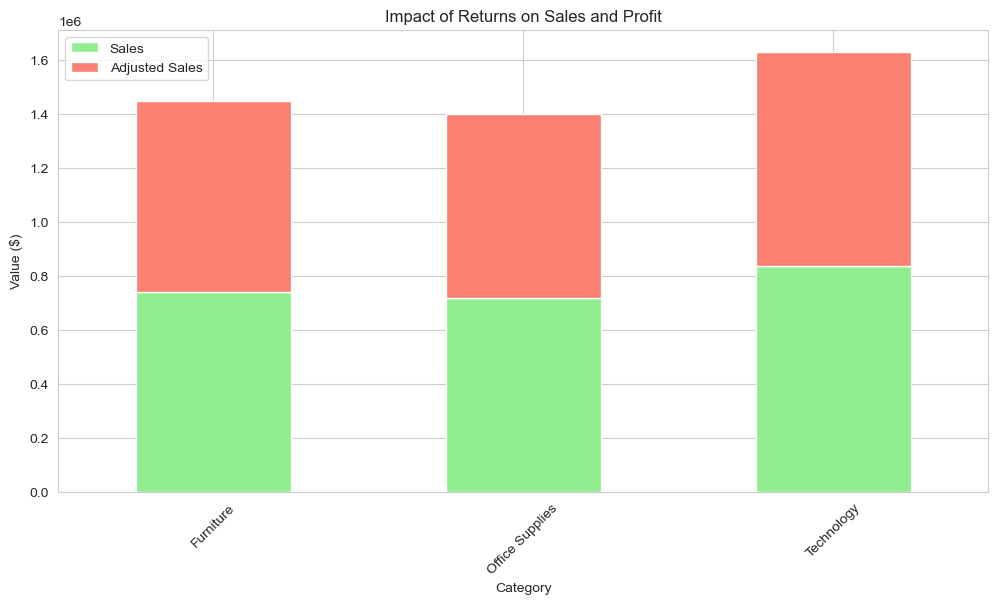


Symmetric Summary Analysis for Returns Impact:
                count       mean       std        min        25%        50%  \
Sales            3.00 765,733.62 62,056.29 719,047.03 730,523.41 741,999.80   
Adjusted Sales   3.00 727,446.94 58,953.48 683,094.68 693,997.24 704,899.81   

                      75%        max  
Sales          789,076.91 836,154.03  
Adjusted Sales 749,623.07 794,346.33  


,Sales,Adjusted Sales,Profit,Adjusted Profit
Category,,,,
Furniture,"741,999.80","704,899.81","18,451.27","-18,648.72"
Office Supplies,"719,047.03","683,094.68","122,490.80","86,538.45"
Technology,"836,154.03","794,346.33","145,454.95","103,647.25"


In [195]:
def simulate_returns(data, return_rate=0.05):
    data['Returns'] = data['Sales'] * return_rate  
    return data
def impact_of_returns(data):
    if 'Returns' in data.columns:
        data['Adjusted Sales'] = data['Sales'] - data['Returns']
        data['Adjusted Profit'] = data['Profit'] - data['Returns']
        return_analysis = data.groupby('Category')[['Sales', 'Adjusted Sales', 'Profit', 'Adjusted Profit']].sum()
        return_analysis[['Sales', 'Adjusted Sales']].plot(kind='bar', figsize=(12, 6), stacked=True, color=['lightgreen', 'salmon'])
        plt.title("Impact of Returns on Sales and Profit")
        plt.xlabel("Category")
        plt.ylabel("Value ($)")
        plt.xticks(rotation=45)
        plt.show()
        print("\nSymmetric Summary Analysis for Returns Impact:")
        print(return_analysis[['Sales', 'Adjusted Sales']].describe().T)
        return return_analysis
    else:
        print("'Returns' column not found in the dataset. Simulating returns...")
        data = simulate_returns(data)
        data['Adjusted Sales'] = data['Sales'] - data['Returns']
        data['Adjusted Profit'] = data['Profit'] - data['Returns']
        return_analysis = data.groupby('Category')[['Sales', 'Adjusted Sales', 'Profit', 'Adjusted Profit']].sum()
        return_analysis[['Sales', 'Adjusted Sales']].plot(kind='bar', figsize=(12, 6), stacked=True, color=['lightgreen', 'salmon'])
        plt.title("Simulated Impact of Returns on Sales and Profit")
        plt.xlabel("Category")
        plt.ylabel("Value ($)")
        plt.xticks(rotation=45)
        plt.show()
        print("\nSymmetric Summary Analysis for Simulated Returns Impact:")
        print(return_analysis[['Sales', 'Adjusted Sales']].describe().T)
        return return_analysis
impact_of_returns(data_cleaned)

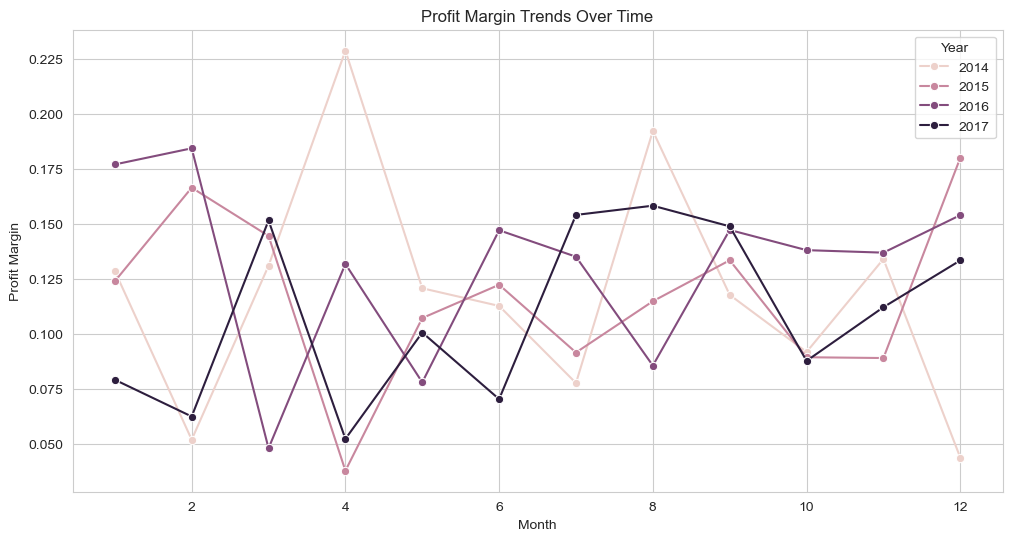


--- Symmetric Summary for Profit Margins ---
count   48.00
mean     0.12
std      0.04
min      0.04
25%      0.09
50%      0.12
75%      0.15
max      0.23
Name: Profit Margin, dtype: float64


,Year,Month,Profit Margin
0,2014,1,0.13
1,2014,2,0.05
2,2014,3,0.13
3,2014,4,0.23
4,2014,5,0.12
5,2014,6,0.11
6,2014,7,0.08
7,2014,8,0.19
8,2014,9,0.12
9,2014,10,0.09


In [177]:
def profit_margin_trends(data):
    if 'Order Date' in data.columns:
        data['Order Date'] = pd.to_datetime(data['Order Date'])
        data['Year'] = data['Order Date'].dt.year
        data['Month'] = data['Order Date'].dt.month
        data['Profit Margin'] = data['Profit'] / data['Sales']
        profit_margin_by_time = data.groupby(['Year', 'Month'])['Profit Margin'].mean().reset_index()
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=profit_margin_by_time, x='Month', y='Profit Margin', hue='Year', marker='o')
        plt.title("Profit Margin Trends Over Time")
        plt.xlabel("Month")
        plt.ylabel("Profit Margin")
        plt.show()
        print("\n--- Symmetric Summary for Profit Margins ---")
        print(profit_margin_by_time['Profit Margin'].describe().T)
        
        return profit_margin_by_time
    else:
        print("'Order Date' column not found in the dataset.")
profit_margin_trends(data_cleaned)


Product Categories Analysis:
                      Sales     Profit
Category                             
Technology      836,154.03 145,454.95
Furniture       741,999.80  18,451.27
Office Supplies 719,047.03 122,490.80


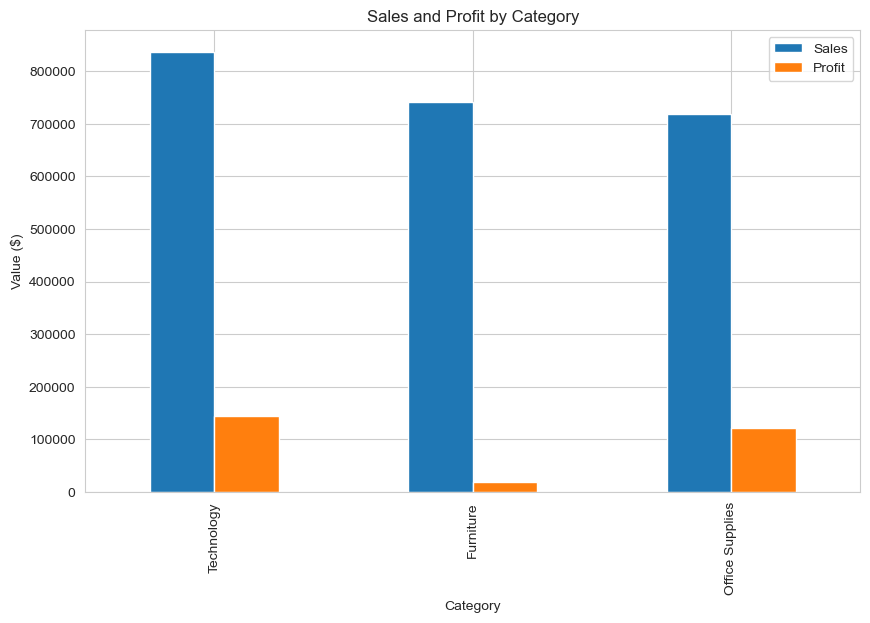


Symmetric Summary for Product Categories:
           Sales     Profit
count       3.00       3.00
mean  765,733.62  95,465.67
std    62,056.29  67,677.56
min   719,047.03  18,451.27
25%   730,523.41  70,471.04
50%   741,999.80 122,490.80
75%   789,076.91 133,972.87
max   836,154.03 145,454.95


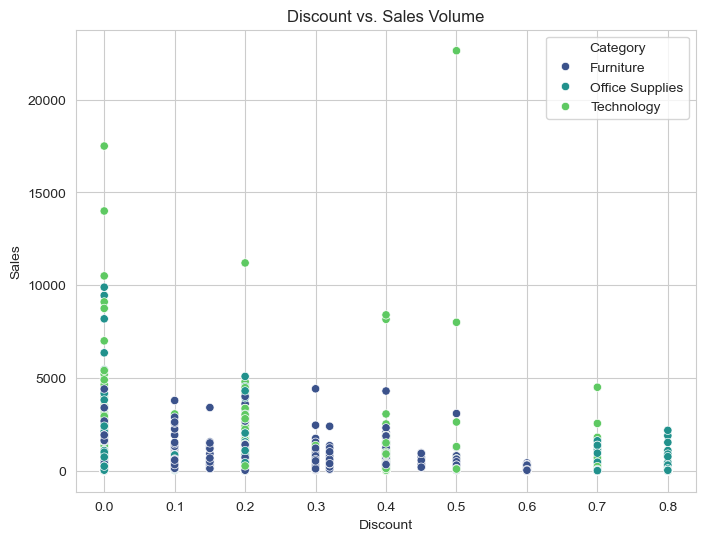


Correlation Between Discount and Sales Volume:
          Discount  Sales
Discount      1.00  -0.03
Sales        -0.03   1.00

Symmetric Summary for Discount and Sales:
       Discount     Sales
count  9,994.00  9,994.00
mean       0.16    229.86
std        0.21    623.25
min        0.00      0.44
25%        0.00     17.28
50%        0.20     54.49
75%        0.20    209.94
max        0.80 22,638.48

Region Analysis:
              Sales     Profit
Region                       
West    725,457.82 108,418.45
East    678,781.24  91,522.78
Central 501,239.89  39,706.36
South   391,721.91  46,749.43


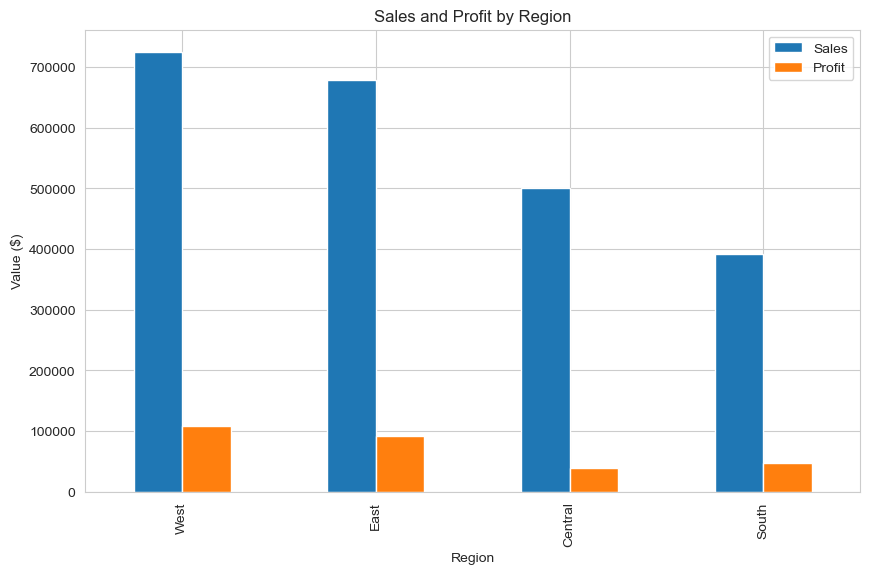


Region Sales and Profit Percentage Contribution:
          Sales %  Profit %
Region                    
West       31.58     37.86
East       29.55     31.96
Central    21.82     13.86
South      17.05     16.32


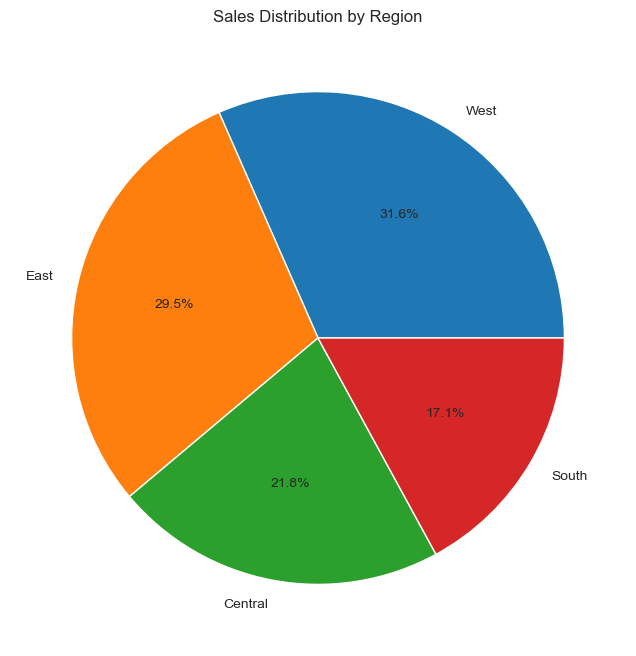

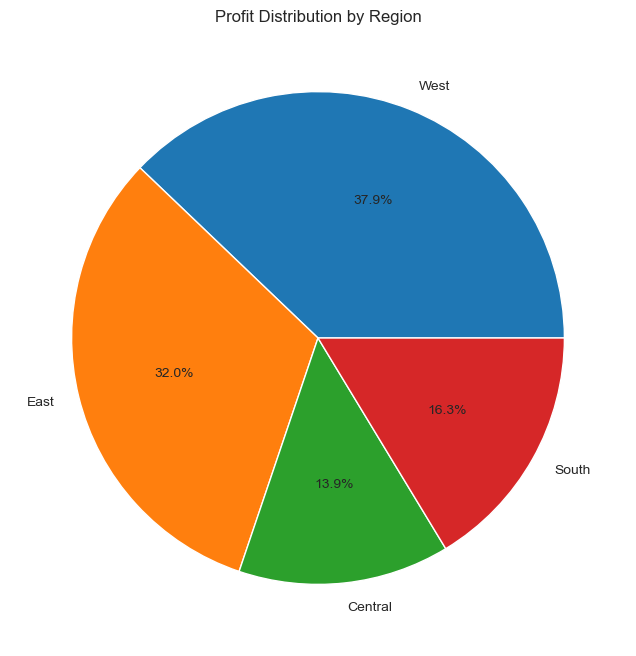


Symmetric Summary for Region Analysis:
           Sales     Profit
count       4.00       4.00
mean  574,300.22  71,599.26
std   155,389.36  33,601.94
min   391,721.91  39,706.36
25%   473,860.39  44,988.66
50%   590,010.57  69,136.11
75%   690,450.39  95,746.70
max   725,457.82 108,418.45

Sales Distribution by Region:
 Region
West      725,457.82
East      678,781.24
Central   501,239.89
South     391,721.91
Name: Sales, dtype: float64


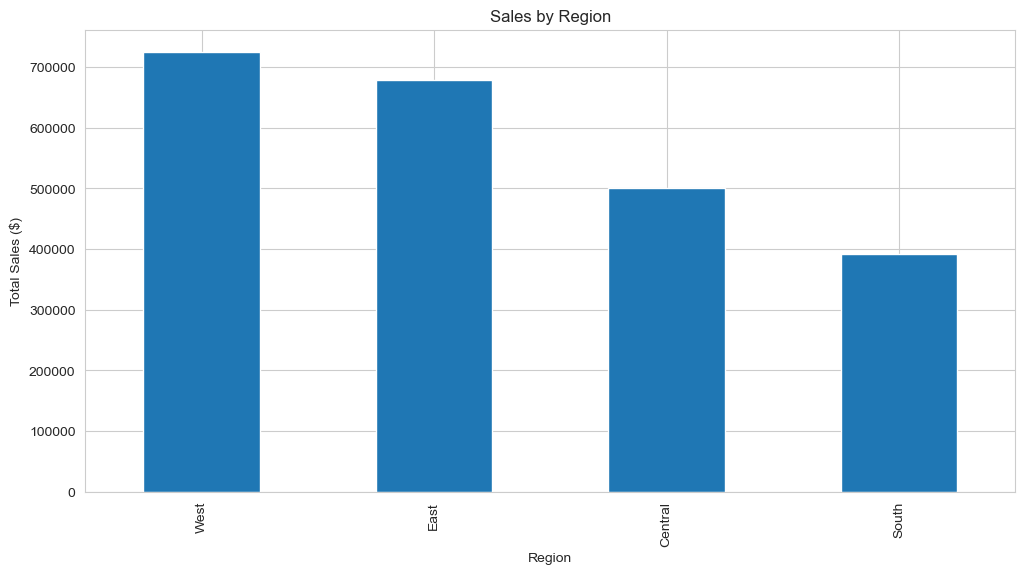


Symmetric Summary for Sales by Region:
count         4.00
mean    574,300.22
std     155,389.36
min     391,721.91
25%     473,860.39
50%     590,010.57
75%     690,450.39
max     725,457.82
Name: Sales, dtype: float64

Sales and Profit by Ship Mode:
                       Sales     Profit
Ship Mode                             
First Class      351,428.42  48,969.84
Same Day         128,363.12  15,891.76
Second Class     459,193.57  57,446.64
Standard Class 1,358,215.74 164,088.79


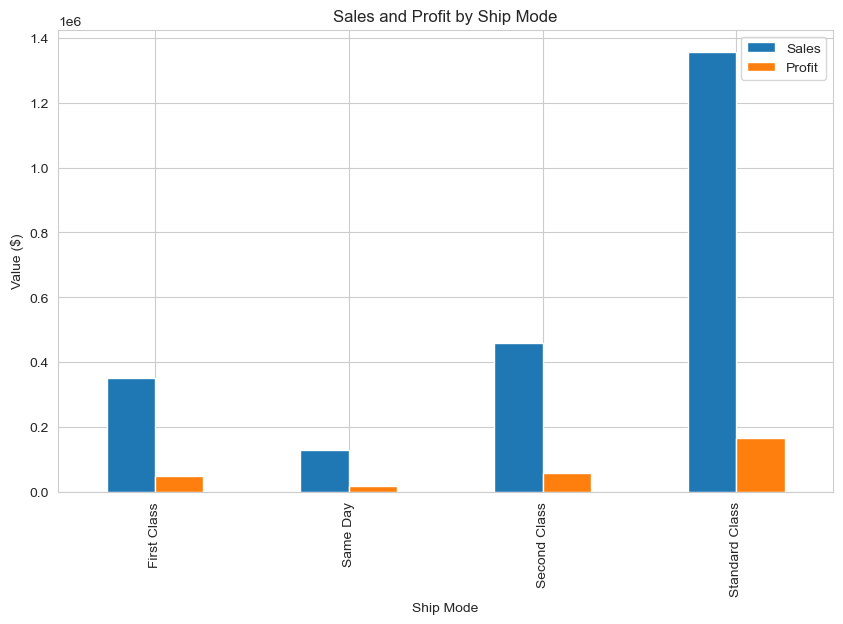


Symmetric Summary for Ship Mode Analysis:
             Sales     Profit
count         4.00       4.00
mean    574,300.22  71,599.26
std     540,464.25  64,213.25
min     128,363.12  15,891.76
25%     295,662.10  40,700.32
50%     405,311.00  53,208.24
75%     683,949.11  84,107.17
max   1,358,215.74 164,088.79

Average Sales per Transaction by Region:
 Region
Central   215.77
East      238.34
South     241.80
West      226.49
Name: Sales, dtype: float64


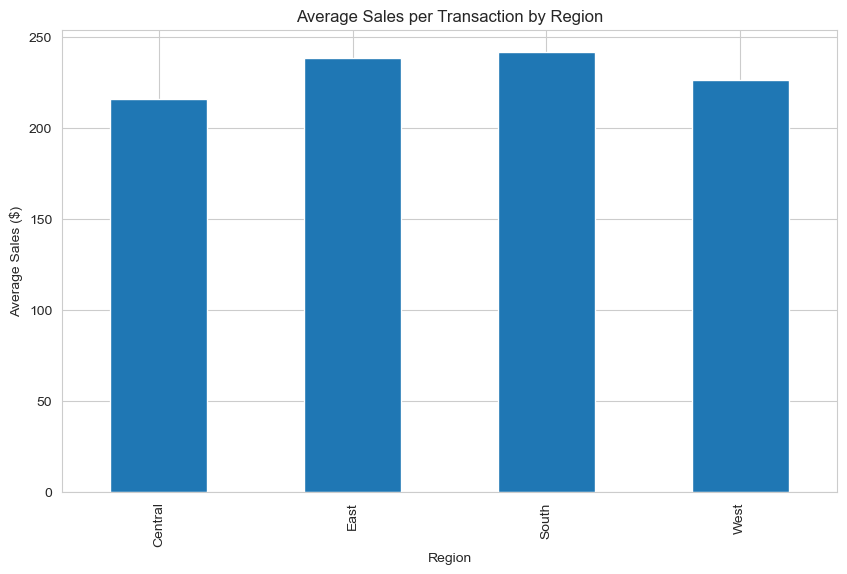


Symmetric Summary for Average Sales per Transaction:
count     4.00
mean    230.60
std      11.86
min     215.77
25%     223.81
50%     232.41
75%     239.20
max     241.80
Name: Sales, dtype: float64


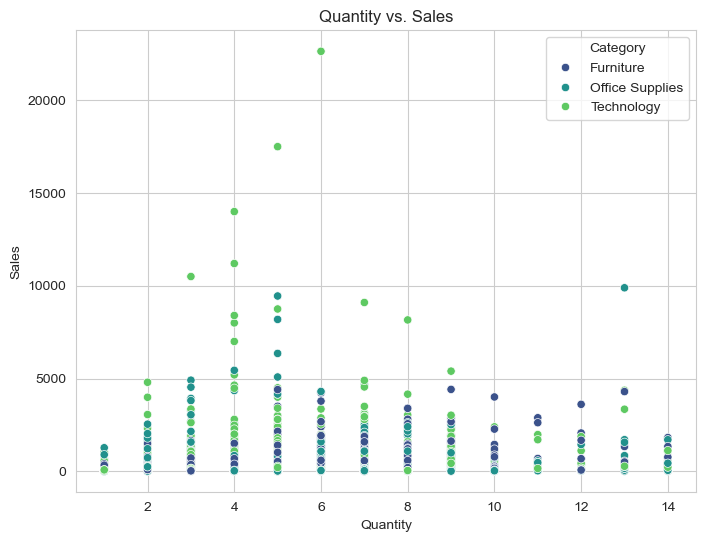


Correlation Between Quantity and Sales:
          Quantity  Sales
Quantity      1.00   0.20
Sales         0.20   1.00

Symmetric Summary for Quantity and Sales:
       Quantity     Sales
count  9,994.00  9,994.00
mean       3.79    229.86
std        2.23    623.25
min        1.00      0.44
25%        2.00     17.28
50%        3.00     54.49
75%        5.00    209.94
max       14.00 22,638.48


In [197]:
def Data_Visualization(data):
    if 'Category' in data.columns:
        category_analysis = data.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
        print("\nProduct Categories Analysis:\n", category_analysis)
        category_analysis.plot(kind='bar', figsize=(10, 6), title="Sales and Profit by Category")
        plt.ylabel("Value ($)")
        plt.show()
        print("\nSymmetric Summary for Product Categories:")
        print(category_analysis[['Sales', 'Profit']].describe())
    if 'Discount' in data.columns and 'Sales' in data.columns:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=data, x='Discount', y='Sales', hue='Category', palette='viridis')
        plt.title("Discount vs. Sales Volume")
        plt.show()
        print("\nCorrelation Between Discount and Sales Volume:")
        print(data[['Discount', 'Sales']].corr())
        print("\nSymmetric Summary for Discount and Sales:")
        print(data[['Discount', 'Sales']].describe())
    if 'Region' in data.columns:
        region_analysis = data.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
        print("\nRegion Analysis:\n", region_analysis)
        region_analysis.plot(kind='bar', figsize=(10, 6), title="Sales and Profit by Region")
        plt.ylabel("Value ($)")
        plt.show()
        region_analysis['Sales %'] = (region_analysis['Sales'] / region_analysis['Sales'].sum()) * 100
        region_analysis['Profit %'] = (region_analysis['Profit'] / region_analysis['Profit'].sum()) * 100
        print("\nRegion Sales and Profit Percentage Contribution:\n", region_analysis[['Sales %', 'Profit %']])
        region_analysis['Sales'].plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title="Sales Distribution by Region")
        plt.ylabel("")
        plt.show()
        region_analysis['Profit'].plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title="Profit Distribution by Region")
        plt.ylabel("")
        plt.show()
        print("\nSymmetric Summary for Region Analysis:")
        print(region_analysis[['Sales', 'Profit']].describe())
    if 'Shipping Cost' in data.columns:
        shipping_analysis = data.groupby('Region')[['Shipping Cost', 'Sales', 'Profit']].sum()
        print("\nShipping Costs Analysis by Region:\n", shipping_analysis)
        sns.scatterplot(data=data, x='Shipping Cost', y='Profit', hue='Region', palette='coolwarm')
        plt.title("Shipping Cost vs. Profit")
        plt.show()
        print("\nSymmetric Summary for Shipping Costs and Profit:")
        print(shipping_analysis[['Shipping Cost', 'Profit']].describe())
    if 'Region' in data.columns:
        region_sales_analysis = data.groupby('Region')['Sales'].sum().sort_values(ascending=False)
        print("\nSales Distribution by Region:\n", region_sales_analysis)
        region_sales_analysis.plot(kind='bar', figsize=(12, 6), title="Sales by Region")
        plt.ylabel("Total Sales ($)")
        plt.show()
        print("\nSymmetric Summary for Sales by Region:")
        print(region_sales_analysis.describe())
    if 'Ship Mode' in data.columns:
        ship_mode_analysis = data.groupby('Ship Mode')[['Sales', 'Profit']].sum()
        print("\nSales and Profit by Ship Mode:\n", ship_mode_analysis)
        ship_mode_analysis.plot(kind='bar', figsize=(10, 6), title="Sales and Profit by Ship Mode")
        plt.ylabel("Value ($)")
        plt.show()
        print("\nSymmetric Summary for Ship Mode Analysis:")
        print(ship_mode_analysis[['Sales', 'Profit']].describe())
    if 'Region' in data.columns and 'Sales' in data.columns:
        avg_sales_region = data.groupby('Region')['Sales'].mean()
        print("\nAverage Sales per Transaction by Region:\n", avg_sales_region)
        avg_sales_region.plot(kind='bar', figsize=(10, 6), title="Average Sales per Transaction by Region")
        plt.ylabel("Average Sales ($)")
        plt.show()
        print("\nSymmetric Summary for Average Sales per Transaction:")
        print(avg_sales_region.describe())
    if 'Quantity' in data.columns and 'Sales' in data.columns:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(data=data, x='Quantity', y='Sales', hue='Category', palette='viridis')
        plt.title("Quantity vs. Sales")
        plt.show()
        print("\nCorrelation Between Quantity and Sales:")
        print(data[['Quantity', 'Sales']].corr())
        print("\nSymmetric Summary for Quantity and Sales:")
        print(data[['Quantity', 'Sales']].describe())
Data_Visualization(data_cleaned)


--- Descriptive Statistics ---

Descriptive Statistics Summary:
               count      mean       std       min       25%       50%  \
Row ID      9,994.00  4,997.50  2,885.16      1.00  2,499.25  4,997.50   
Postal Code 9,994.00 55,190.38 32,063.69  1,040.00 23,223.00 56,430.50   
Sales       9,994.00    229.86    623.25      0.44     17.28     54.49   
Quantity    9,994.00      3.79      2.23      1.00      2.00      3.00   
Discount    9,994.00      0.16      0.21      0.00      0.00      0.20   
Profit      9,994.00     28.66    234.26 -6,599.98      1.73      8.67   
Year        9,994.00  2,015.72      1.12  2,014.00  2,015.00  2,016.00   
Month       9,994.00      7.81      3.28      1.00      5.00      9.00   
Quarter     9,994.00      2.88      1.06      1.00      2.00      3.00   

                  75%       max  
Row ID       7,495.75  9,994.00  
Postal Code 90,008.00 99,301.00  
Sales          209.94 22,638.48  
Quantity         5.00     14.00  
Discount         0.20   

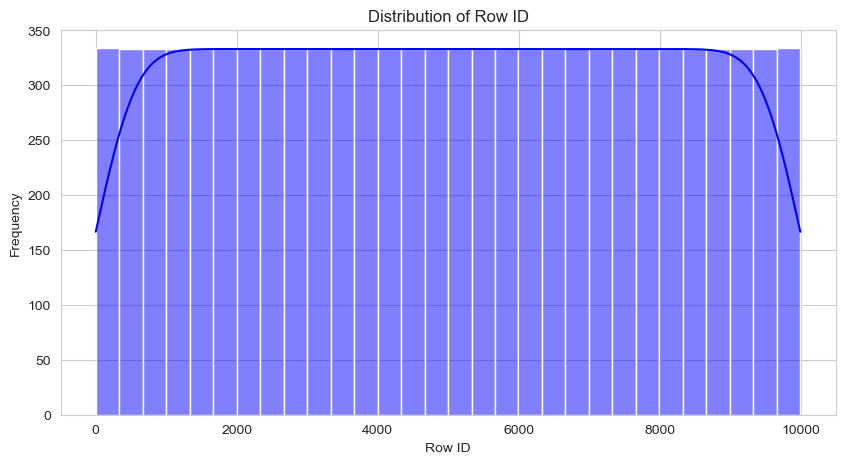


Symmetric Summary for Row ID:
Mean: 4997.5
Standard Deviation: 2885.1636290974325
Min: 1.0
25th Percentile: 2499.25
50th Percentile (Median): 4997.5
75th Percentile: 7495.75
Max: 9994.0
Skewness: 0.0
Kurtosis: -1.2000000000000002
----------------------------------------


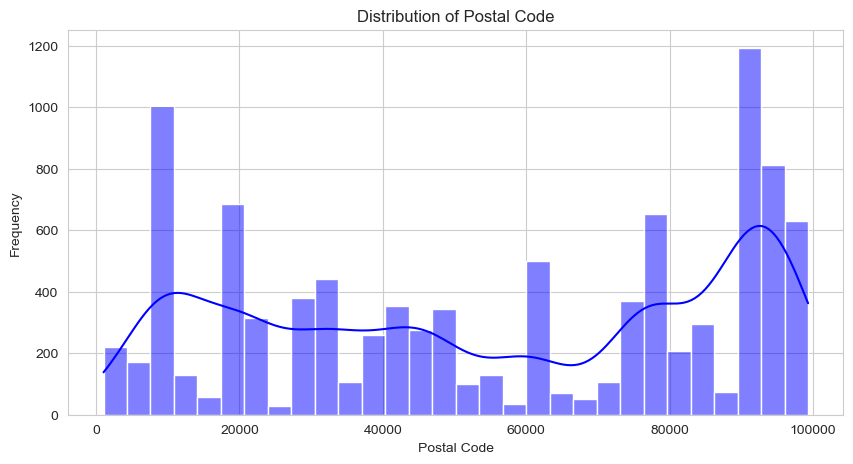


Symmetric Summary for Postal Code:
Mean: 55190.3794276566
Standard Deviation: 32063.693350364727
Min: 1040.0
25th Percentile: 23223.0
50th Percentile (Median): 56430.5
75th Percentile: 90008.0
Max: 99301.0
Skewness: -0.12852551641989202
Kurtosis: -1.493020228144796
----------------------------------------


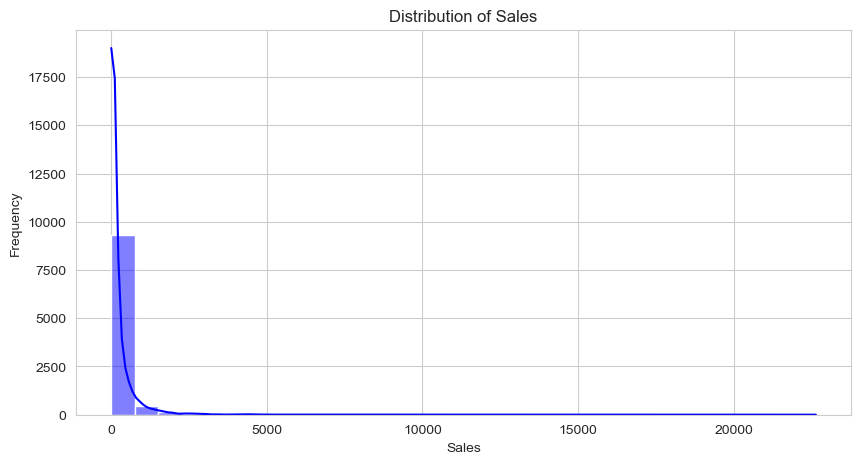


Symmetric Summary for Sales:
Mean: 229.85800083049833
Standard Deviation: 623.2451005086818
Min: 0.444
25th Percentile: 17.28
50th Percentile (Median): 54.489999999999995
75th Percentile: 209.94
Max: 22638.48
Skewness: 12.97275234181623
Kurtosis: 305.311753246823
----------------------------------------


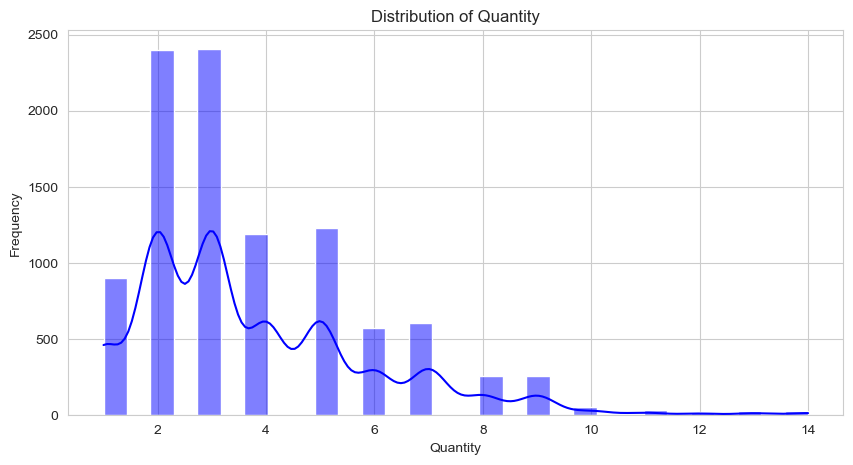


Symmetric Summary for Quantity:
Mean: 3.789573744246548
Standard Deviation: 2.2251096911414274
Min: 1.0
25th Percentile: 2.0
50th Percentile (Median): 3.0
75th Percentile: 5.0
Max: 14.0
Skewness: 1.2785447527223421
Kurtosis: 1.9918893664821322
----------------------------------------


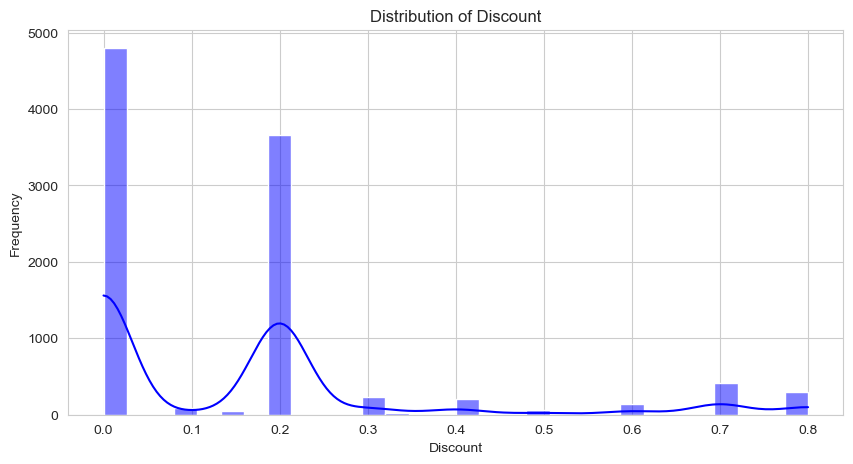


Symmetric Summary for Discount:
Mean: 0.15620272163297977
Standard Deviation: 0.2064519678256984
Min: 0.0
25th Percentile: 0.0
50th Percentile (Median): 0.2
75th Percentile: 0.2
Max: 0.8
Skewness: 1.6842947474238648
Kurtosis: 2.4095461225966774
----------------------------------------


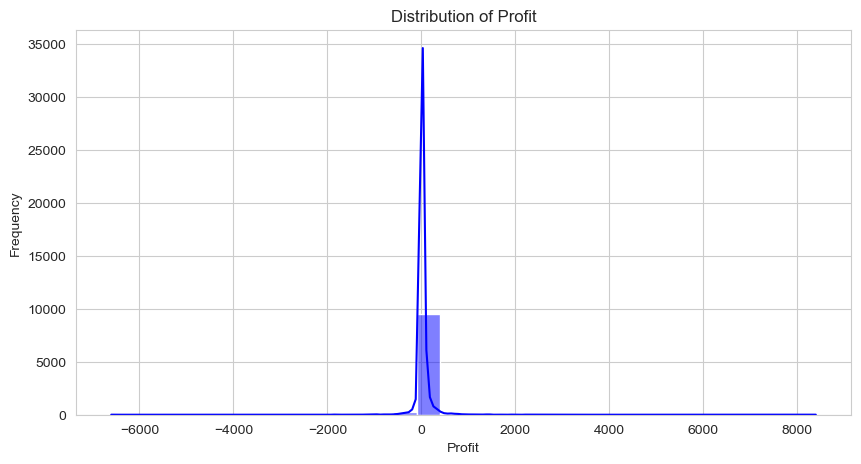


Symmetric Summary for Profit:
Mean: 28.65689630778467
Standard Deviation: 234.26010769095757
Min: -6599.978
25th Percentile: 1.72875
50th Percentile (Median): 8.6665
75th Percentile: 29.364
Max: 8399.976
Skewness: 7.561431562468343
Kurtosis: 397.1885145524141
----------------------------------------


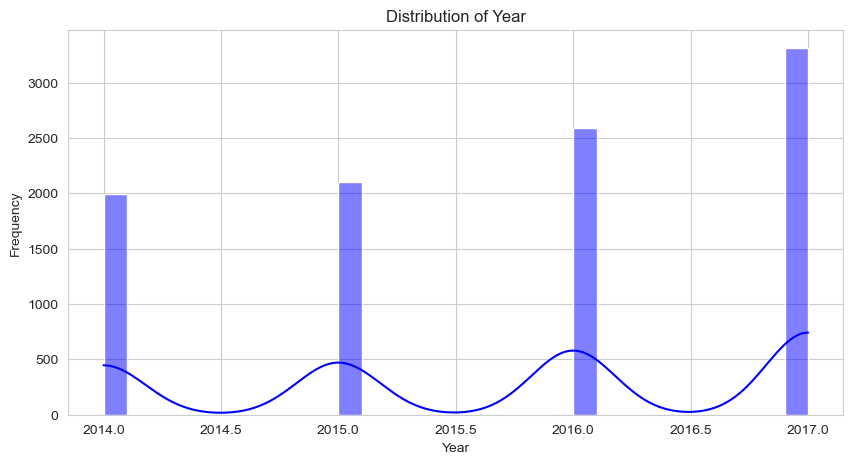


Symmetric Summary for Year:
Mean: 2015.722233340004
Standard Deviation: 1.1235549110442429
Min: 2014.0
25th Percentile: 2015.0
50th Percentile (Median): 2016.0
75th Percentile: 2017.0
Max: 2017.0
Skewness: -0.2828231470596291
Kurtosis: -1.3075649693598626
----------------------------------------


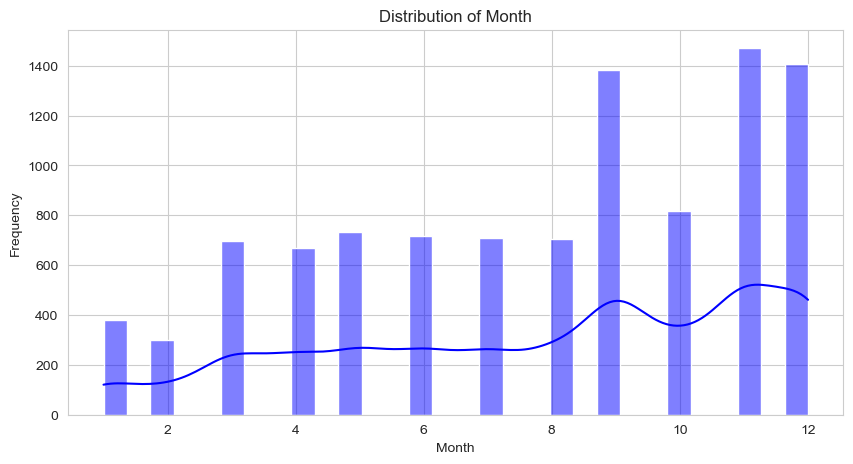


Symmetric Summary for Month:
Mean: 7.809685811486892
Standard Deviation: 3.2846543972695175
Min: 1.0
25th Percentile: 5.0
50th Percentile (Median): 9.0
75th Percentile: 11.0
Max: 12.0
Skewness: -0.42969297483526675
Kurtosis: -0.9913278608754008
----------------------------------------


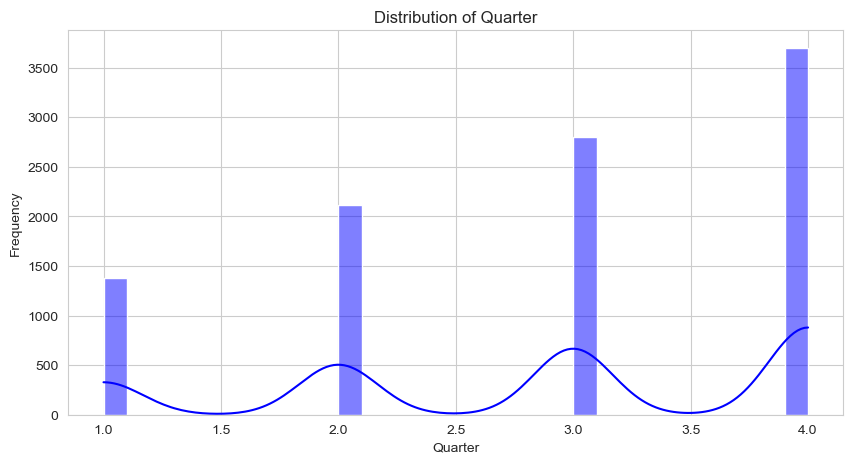


Symmetric Summary for Quarter:
Mean: 2.8823293976385833
Standard Deviation: 1.0580858278493592
Min: 1.0
25th Percentile: 2.0
50th Percentile (Median): 3.0
75th Percentile: 4.0
Max: 4.0
Skewness: -0.46238378743167874
Kurtosis: -1.0561968247572255
----------------------------------------


In [161]:
def descriptive_statistics(data):
    print("\n--- Descriptive Statistics ---")
    numerical_cols = data.select_dtypes(include=[np.number]).columns
    print("\nDescriptive Statistics Summary:")
    descriptive_stats = data[numerical_cols].describe().T
    print(descriptive_stats)
    for col in numerical_cols:
        plt.figure(figsize=(10, 5))
        sns.histplot(data[col], kde=True, bins=30, color="blue")
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Frequency")
        plt.show()
        print(f"\nSymmetric Summary for {col}:")
        print(f"Mean: {descriptive_stats.loc[col, 'mean']}")
        print(f"Standard Deviation: {descriptive_stats.loc[col, 'std']}")
        print(f"Min: {descriptive_stats.loc[col, 'min']}")
        print(f"25th Percentile: {descriptive_stats.loc[col, '25%']}")
        print(f"50th Percentile (Median): {descriptive_stats.loc[col, '50%']}")
        print(f"75th Percentile: {descriptive_stats.loc[col, '75%']}")
        print(f"Max: {descriptive_stats.loc[col, 'max']}")
        print(f"Skewness: {data[col].skew()}")
        print(f"Kurtosis: {data[col].kurtosis()}")       
        print("-" * 40)
descriptive_statistics(data_cleaned)

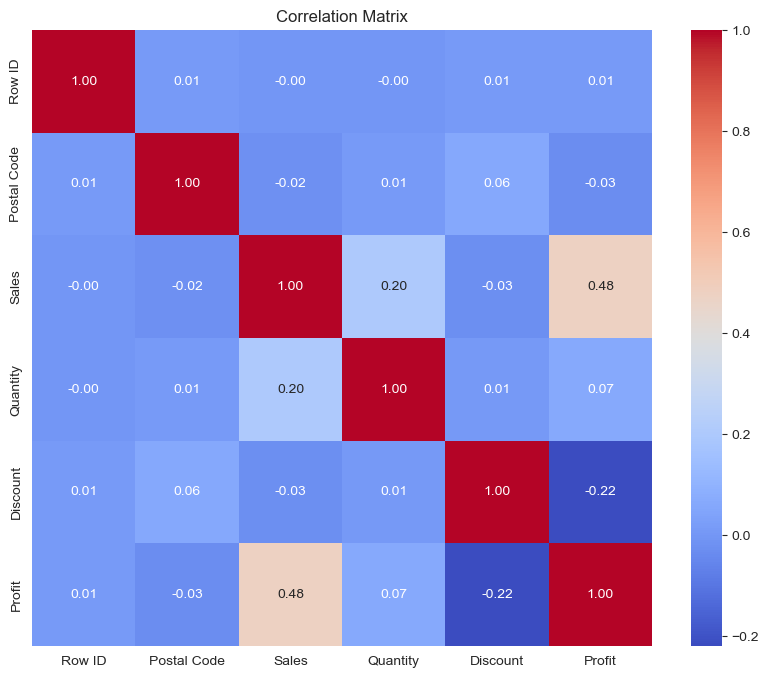

Descriptive Statistics Summary:
               count      mean       std       min       25%       50%  \
Row ID      9,994.00  4,997.50  2,885.16      1.00  2,499.25  4,997.50   
Postal Code 9,994.00 55,190.38 32,063.69  1,040.00 23,223.00 56,430.50   
Sales       9,994.00    229.86    623.25      0.44     17.28     54.49   
Quantity    9,994.00      3.79      2.23      1.00      2.00      3.00   
Discount    9,994.00      0.16      0.21      0.00      0.00      0.20   
Profit      9,994.00     28.66    234.26 -6,599.98      1.73      8.67   

                  75%       max  
Row ID       7,495.75  9,994.00  
Postal Code 90,008.00 99,301.00  
Sales          209.94 22,638.48  
Quantity         5.00     14.00  
Discount         0.20      0.80  
Profit          29.36  8,399.98  

Skewness of numerical columns:
Row ID         0.00
Postal Code   -0.13
Sales         12.97
Quantity       1.28
Discount       1.68
Profit         7.56
dtype: float64

Kurtosis of numerical columns:
Row ID      

In [139]:
def correlation_analysis(data):
    numerical_cols = data.select_dtypes(include=[np.number]).columns
    correlation_matrix = data[numerical_cols].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Matrix")
    plt.show()
    summary_stats = data[numerical_cols].describe().T
    print("Descriptive Statistics Summary:")
    print(summary_stats)
    skewness = data[numerical_cols].skew()
    kurtosis = data[numerical_cols].kurtosis()
    print("\nSkewness of numerical columns:")
    print(skewness)
    print("\nKurtosis of numerical columns:")
    print(kurtosis)
correlation_analysis(data_cleaned)

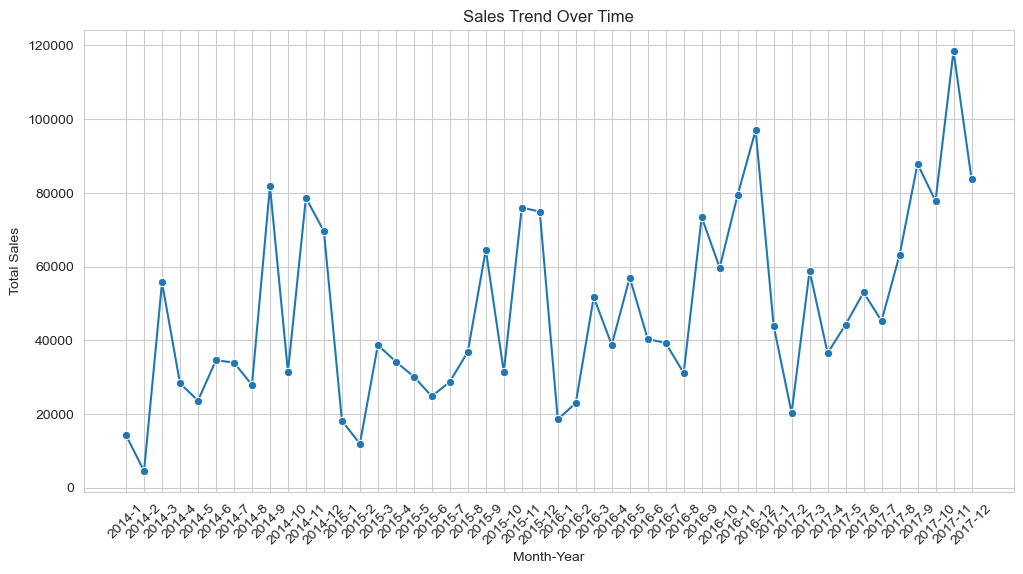

In [155]:
def time_series_analysis(data):
    if 'Order Date' in data.columns:
        data['Year'] = data['Order Date'].dt.year
        data['Month'] = data['Order Date'].dt.month
        data['Quarter'] = data['Order Date'].dt.quarter
        
        time_analysis = data.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
        time_analysis['Month-Year'] = time_analysis['Year'].astype(str) + "-" + time_analysis['Month'].astype(str)
        
        plt.figure(figsize=(12, 6))
        sns.lineplot(data=time_analysis, x='Month-Year', y='Sales', marker='o')
        plt.title("Sales Trend Over Time")
        plt.xticks(rotation=45)
        plt.ylabel("Total Sales")
        plt.show()
time_series_analysis(data_cleaned)


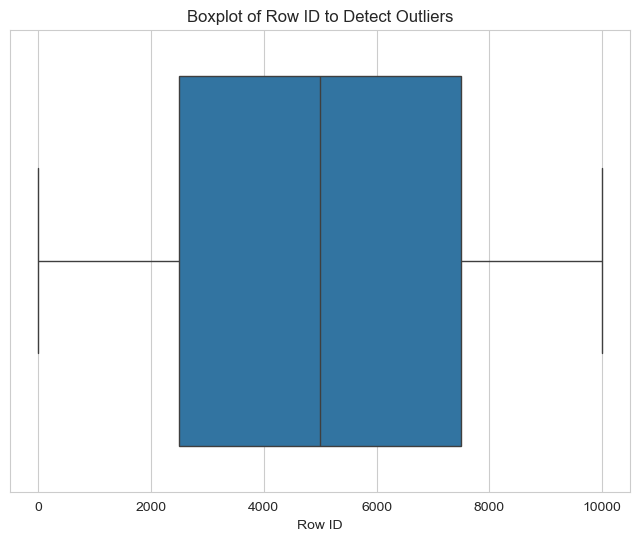

Summary Statistics for Row ID:
count   9,994.00
mean    4,997.50
std     2,885.16
min         1.00
25%     2,499.25
50%     4,997.50
75%     7,495.75
max     9,994.00
Name: Row ID, dtype: float64

Outliers detected in Row ID:
0 outliers detected.


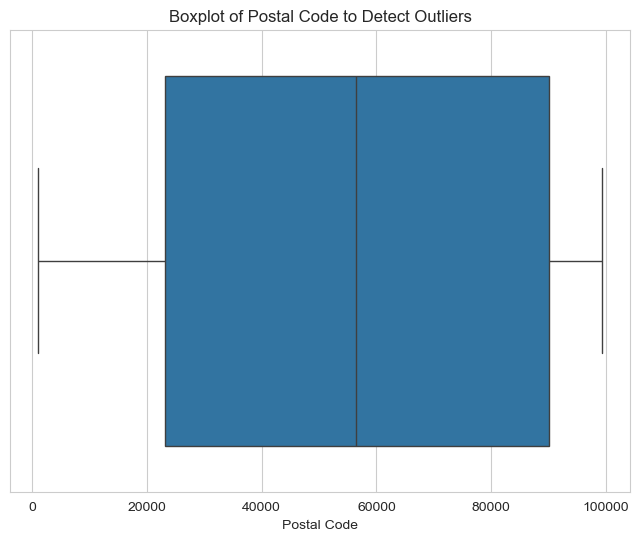

Summary Statistics for Postal Code:
count    9,994.00
mean    55,190.38
std     32,063.69
min      1,040.00
25%     23,223.00
50%     56,430.50
75%     90,008.00
max     99,301.00
Name: Postal Code, dtype: float64

Outliers detected in Postal Code:
0 outliers detected.


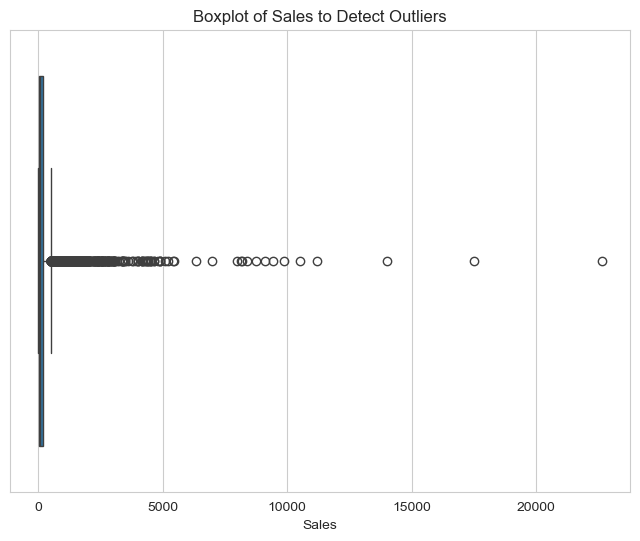

Summary Statistics for Sales:
count    9,994.00
mean       229.86
std        623.25
min          0.44
25%         17.28
50%         54.49
75%        209.94
max     22,638.48
Name: Sales, dtype: float64

Outliers detected in Sales:
1167 outliers detected.
1      731.94
3      957.58
7      907.15
10   1,706.18
11     911.42
Name: Sales, dtype: float64


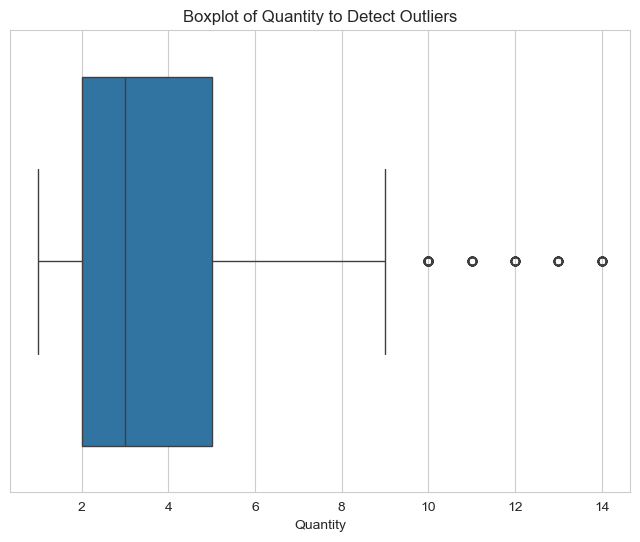

Summary Statistics for Quantity:
count   9,994.00
mean        3.79
std         2.23
min         1.00
25%         2.00
50%         3.00
75%         5.00
max        14.00
Name: Quantity, dtype: float64

Outliers detected in Quantity:
170 outliers detected.
113    14
139    14
147    11
251    13
329    10
Name: Quantity, dtype: int64


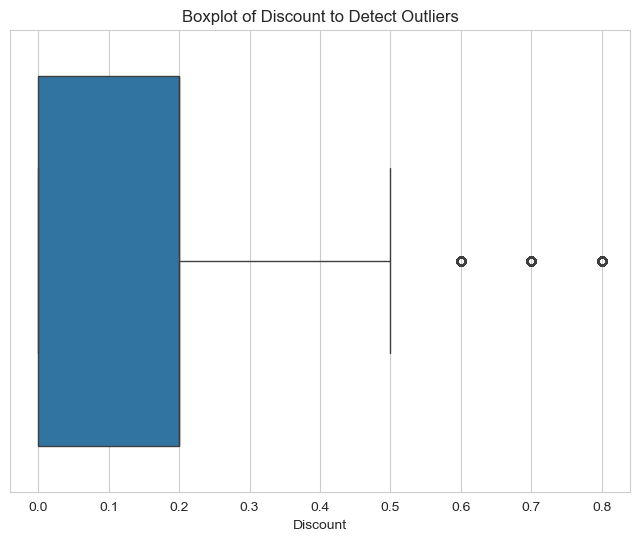

Summary Statistics for Discount:
count   9,994.00
mean        0.16
std         0.21
min         0.00
25%         0.00
50%         0.20
75%         0.20
max         0.80
Name: Discount, dtype: float64

Outliers detected in Discount:
856 outliers detected.
14   0.80
15   0.80
28   0.70
32   0.70
36   0.60
Name: Discount, dtype: float64


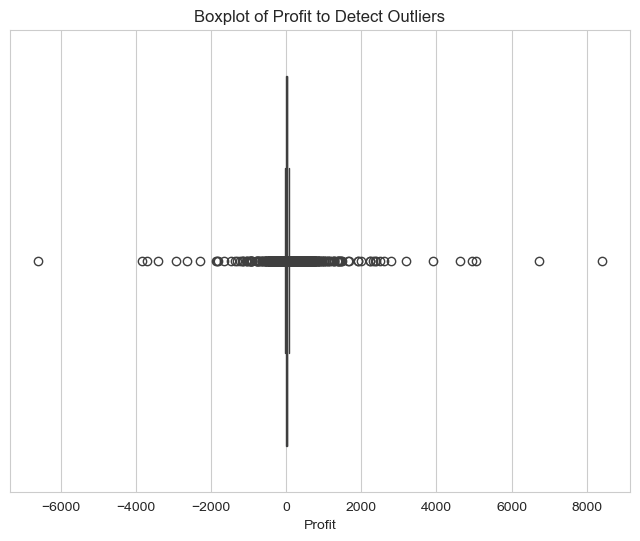

Summary Statistics for Profit:
count    9,994.00
mean        28.66
std        234.26
min     -6,599.98
25%          1.73
50%          8.67
75%         29.36
max      8,399.98
Name: Profit, dtype: float64

Outliers detected in Profit:
1881 outliers detected.
1     219.58
3    -383.03
7      90.72
10     85.31
13    132.59
Name: Profit, dtype: float64


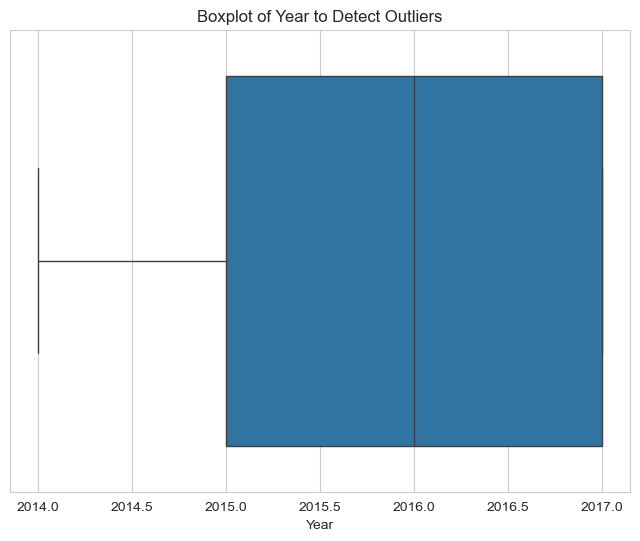

Summary Statistics for Year:
count   9,994.00
mean    2,015.72
std         1.12
min     2,014.00
25%     2,015.00
50%     2,016.00
75%     2,017.00
max     2,017.00
Name: Year, dtype: float64

Outliers detected in Year:
0 outliers detected.


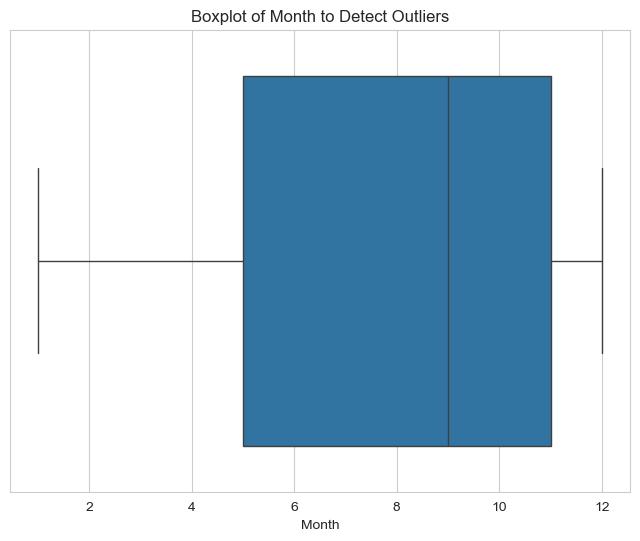

Summary Statistics for Month:
count   9,994.00
mean        7.81
std         3.28
min         1.00
25%         5.00
50%         9.00
75%        11.00
max        12.00
Name: Month, dtype: float64

Outliers detected in Month:
0 outliers detected.


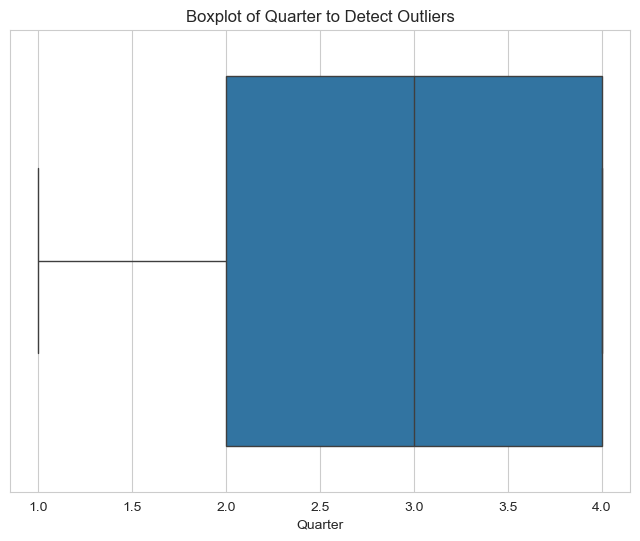

Summary Statistics for Quarter:
count   9,994.00
mean        2.88
std         1.06
min         1.00
25%         2.00
50%         3.00
75%         4.00
max         4.00
Name: Quarter, dtype: float64

Outliers detected in Quarter:
0 outliers detected.


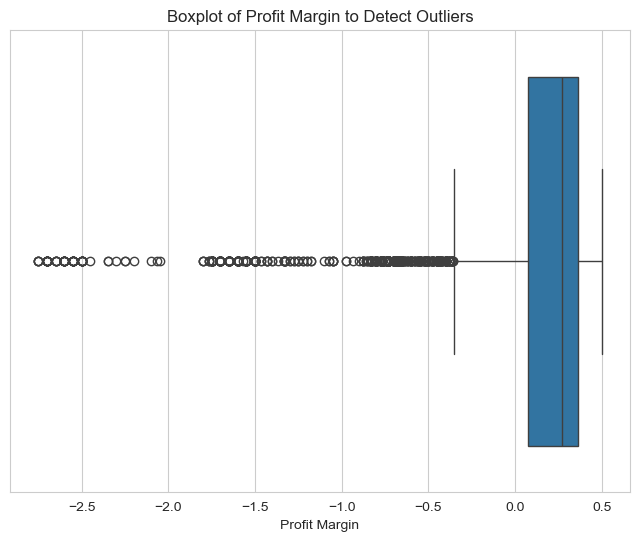

Summary Statistics for Profit Margin:
count   9,994.00
mean        0.12
std         0.47
min        -2.75
25%         0.07
50%         0.27
75%         0.36
max         0.50
Name: Profit Margin, dtype: float64

Outliers detected in Profit Margin:
952 outliers detected.
3    -0.40
14   -1.80
15   -1.50
27   -0.54
28   -0.73
Name: Profit Margin, dtype: float64


In [109]:
def detect_outliers(data):
    numerical_cols = data.select_dtypes(include=[np.number]).columns
    for col in numerical_cols:
        plt.figure(figsize=(8, 6))
        sns.boxplot(data=data, x=col)
        plt.title(f"Boxplot of {col} to Detect Outliers")
        plt.show()
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        summary_stats = data[col].describe()
        print(f"Summary Statistics for {col}:")
        print(summary_stats)
        print(f"\nOutliers detected in {col}:")
        print(outliers.shape[0], "outliers detected.")
        if outliers.shape[0] > 0:
            print(outliers[col].head())
detect_outliers(data_cleaned)

In [115]:
def advanced_calculations(data):
    numerical_cols = data.select_dtypes(include=[np.number]).columns
    print("\nVariance of Numerical Columns:\n", data[numerical_cols].var())
    print("\nStandard Deviation of Numerical Columns:\n", data[numerical_cols].std())
    if 'Profit' in data.columns and 'Sales' in data.columns:
        data['Profit Margin'] = data['Profit'] / data['Sales']
        profit_margin_analysis = data.groupby('Product Name')['Profit Margin'].mean().sort_values()
        print("\nTop 5 Products with Lowest Profit Margins:\n", profit_margin_analysis.head())
        print("\nTop 5 Products with Highest Profit Margins:\n", profit_margin_analysis.tail())
    if 'Returns' in data.columns:
        returned_sales = data[data['Returns'] == 'Yes'].groupby('Category')[['Sales', 'Profit']].sum()
        total_sales = data.groupby('Category')[['Sales', 'Profit']].sum()
        impact_of_returns = total_sales - returned_sales
        print("\nImpact of Returns by Category:\n", impact_of_returns)
        returned_sales.plot(kind='bar', figsize=(10, 6), title="Impact of Returns on Sales and Profit")
        plt.ylabel("Value ($)")
        plt.show()
advanced_calculations(data_cleaned)


Variance of Numerical Columns:
 Row ID              8,324,169.17
Postal Code     1,028,080,431.27
Sales                 388,434.46
Quantity                    4.95
Discount                    0.04
Profit                 54,877.80
Year                        1.26
Month                      10.79
Quarter                     1.12
Profit Margin               0.22
dtype: float64

Standard Deviation of Numerical Columns:
 Row ID           2,885.16
Postal Code     32,063.69
Sales              623.25
Quantity             2.23
Discount             0.21
Profit             234.26
Year                 1.12
Month                3.28
Quarter              1.06
Profit Margin        0.47
dtype: float64

Top 5 Products with Lowest Profit Margins:
 Product Name
Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac           -2.75
Bush Westfield Collection Bookcases, Dark Cherry Finish, Fully Assembled   -2.10
Euro Pro Shark Stick Mini Vacuum                                           -1.77
3.6